In [1]:
import os
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.contrib.itertools import product

In [2]:
os.chdir('../..')

## Model trained on SQuADv1

In [3]:
BATCH_SIZE = 32
SEEDS = [27, 28, 30]
DATASETS = [
    ('bioasq', 'out_sample'),
    ('drop', 'out_sample'),
    ('duorc', 'out_sample'),
    ('hotpotqa', 'in_sample'),
    ('naturalquestions', 'in_sample'),
    ('newsqa', 'in_sample'),
    ('race', 'out_sample'),
    ('relationextraction', 'out_sample'),
    ('searchqa', 'in_sample'),
    ('squad', 'in_sample'),
    ('textbookqa', 'out_sample'),
    ('triviaqa', 'in_sample')
]
SAVE_STEPS_SCHEDULE = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212, 3340, 3468, 3596, 3724, 3852, 3980, 4108, 4236, 4364, 4492, 4620, 4748, 4876, 5004, 5132, 5260, 5388, 5516, 5644, 5772, 5900, 6028, 6156, 6284, 6412, 6540, 6668, 6796, 6924, 7052, 7180, 7308, 7436, 7564, 7692, 7820, 7948]

In [4]:
mrqa_df = pd.DataFrame()

for seed, dataset, checkpoint in tqdm(
    list(itertools.product(SEEDS, DATASETS, SAVE_STEPS_SCHEDULE))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-mrqa-wu=100-lr=3e5-bs=32-msl=384-seed={seed}-dataset={dataset[0]}/checkpoint-{checkpoint}/predict_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['dataset'] = dataset[0]
    df['checkpoint'] = checkpoint
    df['sample'] = dataset[1]

    mrqa_df = mrqa_df.append(df, ignore_index=True)

100%|██████████| 4320/4320 [02:32<00:00, 28.24it/s] 


In [5]:
mrqa_df['num_examples'] = mrqa_df['checkpoint'] * BATCH_SIZE

In [6]:
print(mrqa_df.shape)
mrqa_df.head()

(4320, 8)


,exact_match,f1,predict_samples,seed,dataset,checkpoint,sample,num_examples
0,0.0,4.563510,2139.0,27,bioasq,1,out_sample,32
1,0.0,4.563510,2139.0,27,bioasq,2,out_sample,64
2,0.0,4.588449,2139.0,27,bioasq,3,out_sample,96
3,0.0,4.683181,2139.0,27,bioasq,4,out_sample,128
4,0.0,4.659941,2139.0,27,bioasq,5,out_sample,160


In [7]:
12*3*120

4320

### In-sample

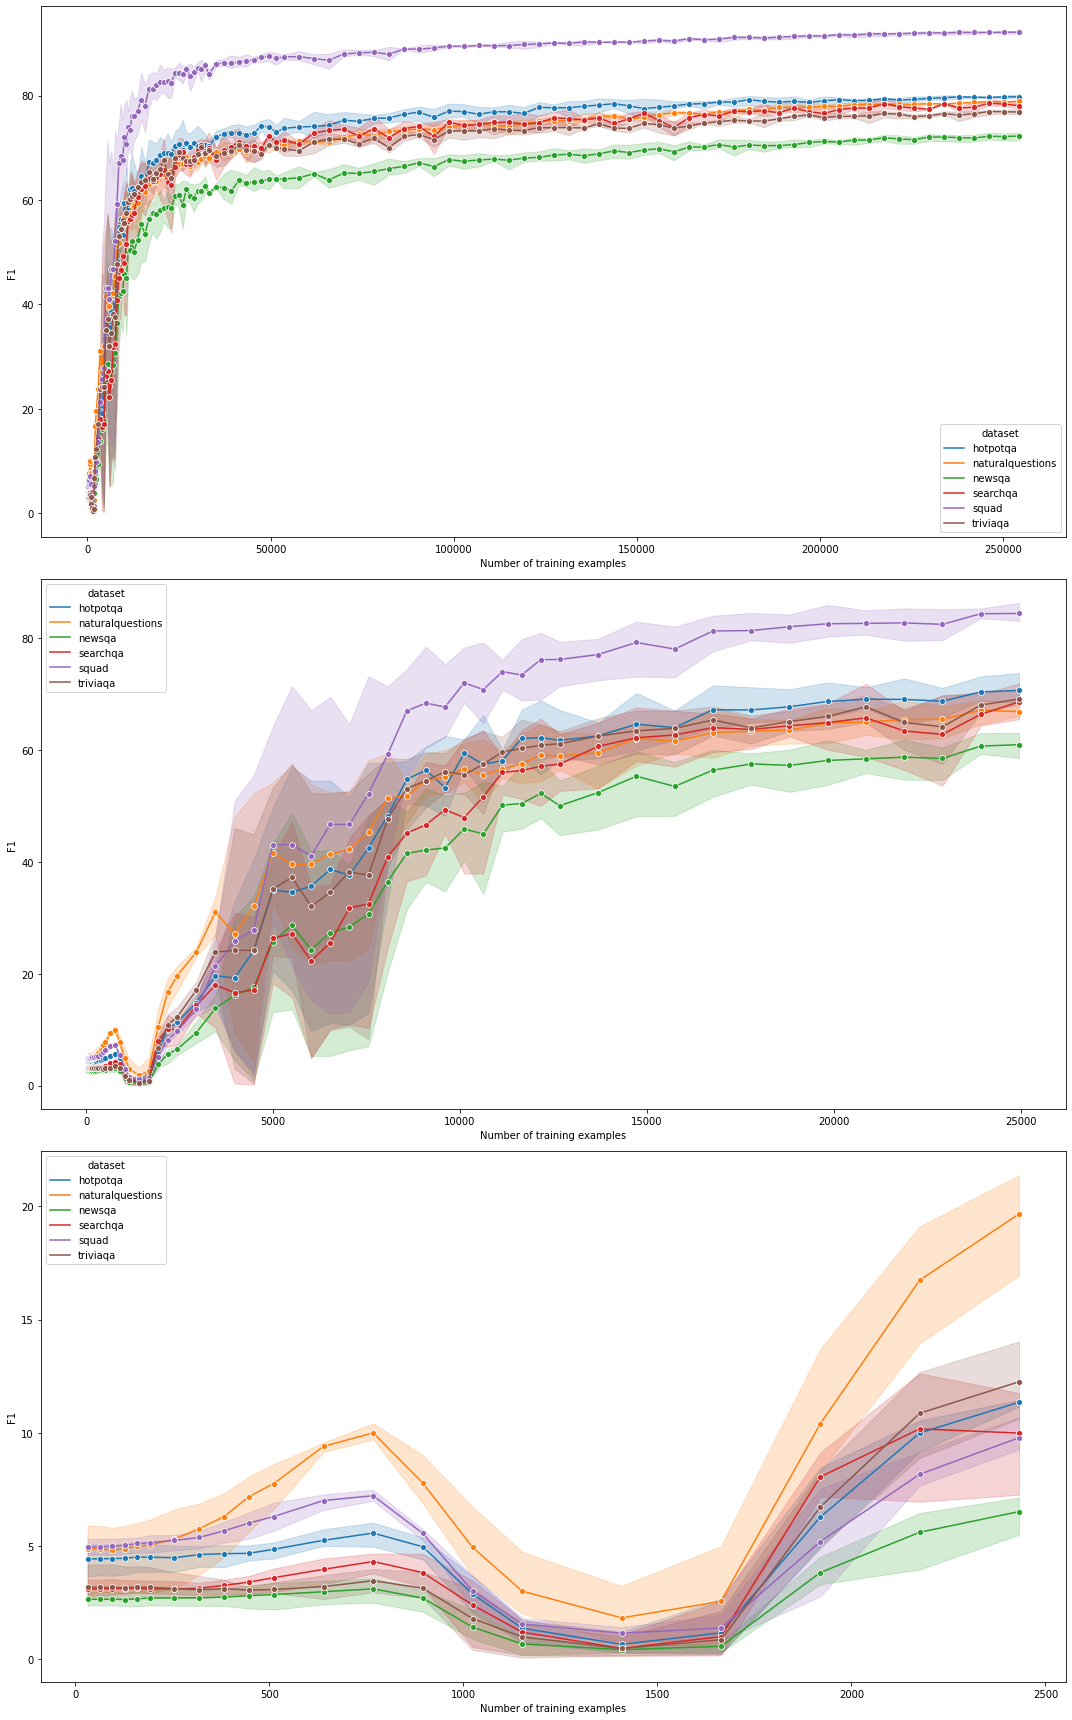

In [8]:
fig, axs = plt.subplots(3, figsize=(15, 24))

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'in_sample'], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[0])
axs[0].set_ylabel('F1')
axs[0].set_xlabel('Number of training examples')

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'in_sample'][mrqa_df[mrqa_df['sample'] == 'in_sample']['num_examples'] < 25000], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[1])
axs[1].set_ylabel('F1')
axs[1].set_xlabel('Number of training examples')

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'in_sample'][mrqa_df[mrqa_df['sample'] == 'in_sample']['num_examples'] < 2500], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[2])
axs[2].set_ylabel('F1')
axs[2].set_xlabel('Number of training examples')

plt.tight_layout()

plt.savefig('reports/figures/mrqa-in-sample.pdf')

plt.show()

### Out-sample

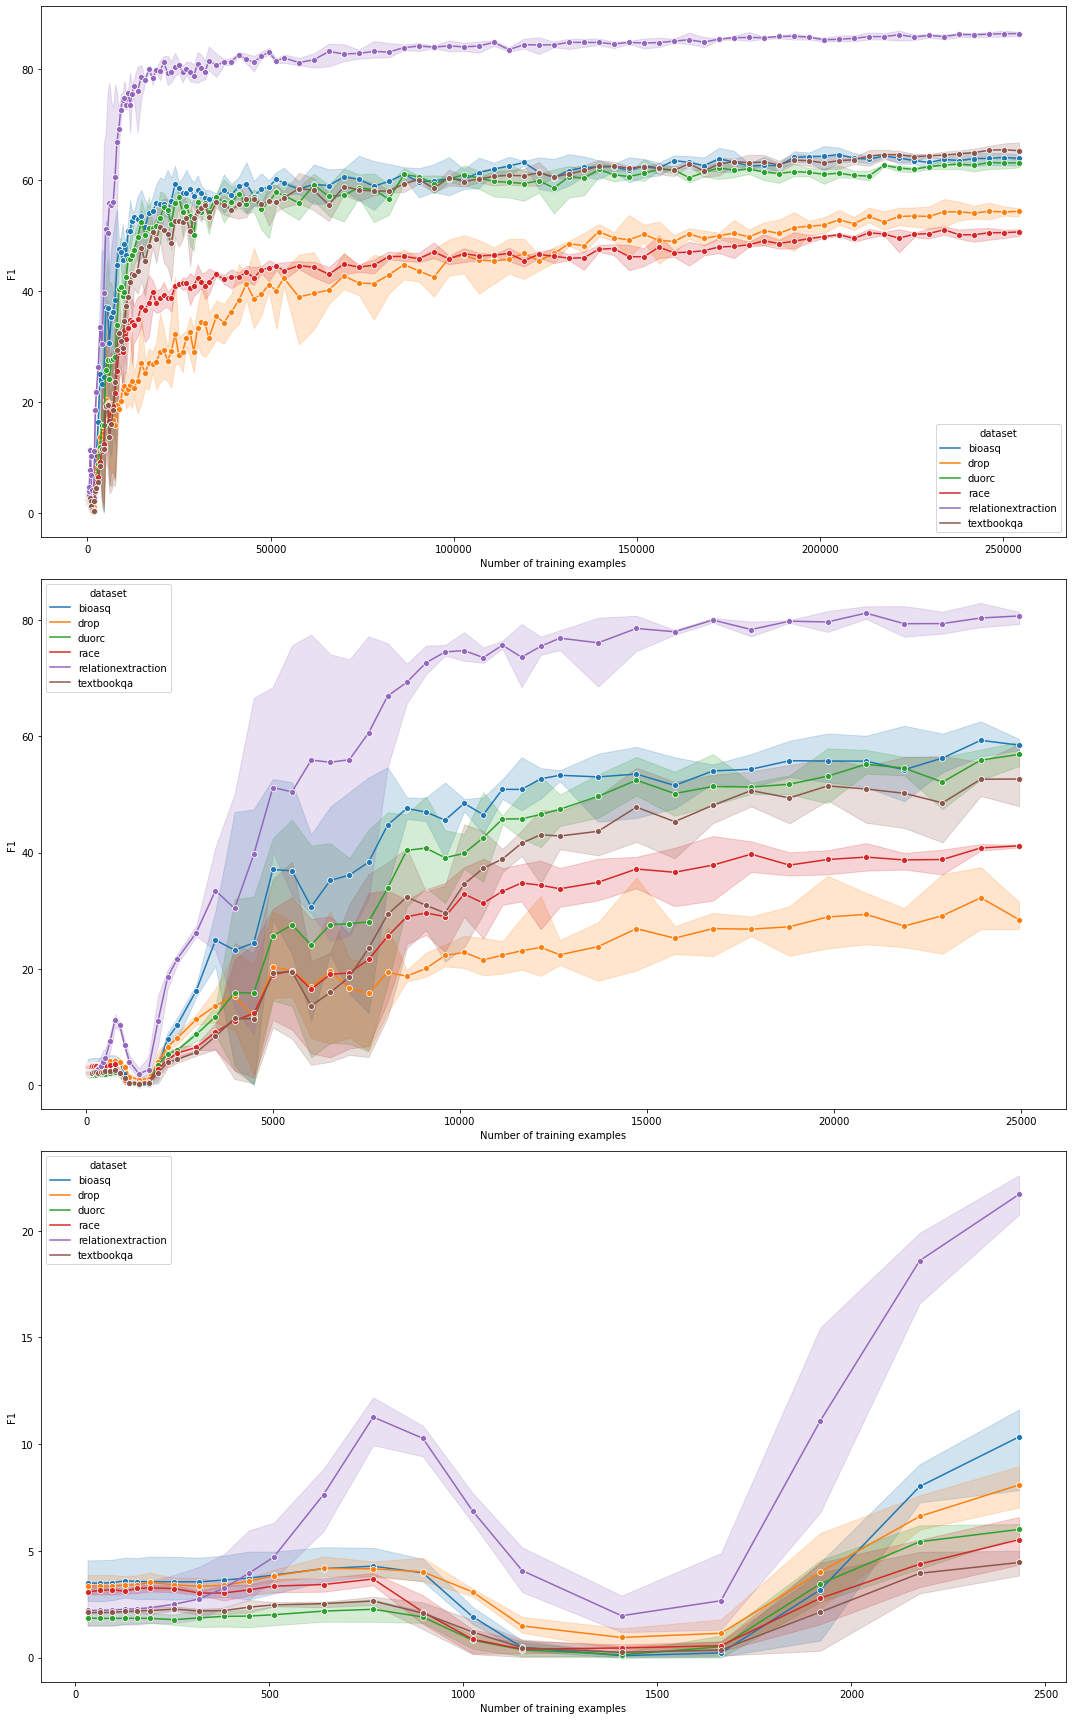

In [9]:
fig, axs = plt.subplots(3, figsize=(15, 24))

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'out_sample'], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[0])
axs[0].set_ylabel('F1')
axs[0].set_xlabel('Number of training examples')

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'out_sample'][mrqa_df[mrqa_df['sample'] == 'out_sample']['num_examples'] < 25000], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[1])
axs[1].set_ylabel('F1')
axs[1].set_xlabel('Number of training examples')

sns.lineplot(data=mrqa_df[mrqa_df['sample'] == 'out_sample'][mrqa_df[mrqa_df['sample'] == 'out_sample']['num_examples'] < 2500], x='num_examples', y='f1', hue='dataset', marker='o', ax=axs[2])
axs[2].set_ylabel('F1')
axs[2].set_xlabel('Number of training examples')

plt.tight_layout()

plt.savefig('reports/figures/mrqa-out-sample.pdf')

plt.show()